[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


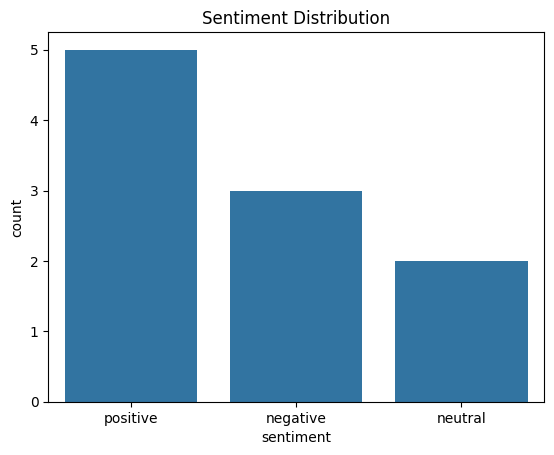

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       2.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Review: It was amazing → Sentiment: positive
Review: So bad → Sentiment: positive
Review: I would buy again → Sentiment: positive
Review: Not worth it → Sentiment: positive


C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Download NLTK data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 2: Load Dataset (Create Your Own or Use Kaggle IMDb)
# Sample dataset
data = {
    'review': [
        'This product is great!',
        'I hate this item, worst ever.',
        'It was okay, not too good or bad.',
        'Absolutely wonderful!',
        'Terrible, very disappointed.',
        'I loved it!',
        'Will not buy again.',
        'Decent quality for the price.',
        'Awful experience!',
        'Highly recommend this!'
    ]
}
df = pd.DataFrame(data)

# Step 3: Clean the Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned'] = df['review'].apply(clean_text)

# Step 4: Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned'].apply(get_sentiment)

# Step 5: Visualize Sentiment Distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Step 6: Model Training using Naive Bayes (optional)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Step 8: Show some predictions
test_reviews = ["It was amazing", "So bad", "I would buy again", "Not worth it"]
test_cleaned = [clean_text(r) for r in test_reviews]
test_vect = vectorizer.transform(test_cleaned)
test_preds = model.predict(test_vect)

for review, sentiment in zip(test_reviews, test_preds):
    print(f"Review: {review} → Sentiment: {sentiment}")
